# An introduction to functions

Functions are the building blocks of most programs. Without functions, we would often have to repeat ourselves. They look like this:

In [2]:
sum([23, 24, 25])

72

In [3]:
def add(a, b):
    """Adds two numbers!"""
    result = a + b
    return result

We can 'call' (use) this function:

In [4]:
add(3, 10)

13

In general Python functions have the following pattern, in pseudocode:

```python
    def f(x):
        """Docstring."""
        y = <operations on x>
        return y
```
This is analgous to defining the mathematical function $y = f(x)$.

The idea is that you can organize your code using functions. Instead of just being a long series of instructions, your code can use re-usable blocks, jumping around from block to block.

When you 'call' a function, by using its name and passing it any arguments (input) it needs, it returns its output to exactly the place it was called from.

For example, instead of writing:

```python
    x = (xf - 32) * 9 / 5
    y = (yf - 32) * 5 / 9
    z = (zf - 32) * 5 / 9
```  

It is more readable and easier to maintain &mdash; and probably more correct! &mdash; if we do this:

```python
    def f2c(temp):
        """Convert F to C."""
        return (temp - 32) * 5 / 9
```

Now we can call the function:

```
    x = f2c(xf)
    y = f2c(yf)
    z = f2c(zf)
```

Better yet:

```python
    x, y, z = [f2c(t) for t in [xf, yf, zf]]
```

----


## A simple function

We'll start by defining a very simple function, implementing the acoustic impedance equation:

$$ Z = \rho V_\mathrm{P} $$

In [147]:
def impedance(rho, vp):
    '''
    Calculate the acoustic impedance of a rock, given Vp and rho.
    '''
    z = rho * vp
    return z

In [148]:
impedance(2300, 2500)

5750000

Note that we do not have access to any of the variables inside the function.

In [149]:
z

NameError: name 'z' is not defined

Similarly, if the variable `z` already exists outside the function, it is unaffected by the function:

In [150]:
z = 'Not even a number.'

impedance(2400, 2100)

print(z)

Not even a number.


If you switch the order of the inputs, i.e. you don't rely on their positions, you must name them:

In [152]:
vp, rho = 2500, 2300  # These can be called whatever you like!

impedance(vp=vp, rho=rho)

5750000

## Making a module

Add your function to a new text file called `utils.py`, and save it in the current directory.

Now we'll try importing that module into a new notebook. We'll do it together...

### Instructor notes

Now go to a new notebook and import the new function, then call it. Or go out to a terminal and do it from the interpreter.

If you show them the docstring at this time, it's very cool.

You can do it in this notebook, but it's not as instructive. (If you do it in this notebook, be sure to use `import utils`, not `from utils import impedance` because the latter is confusing given that we already have an existing `impedance` function defined in this notebook.)

### Exercise

We want a function to compute acoustic velocity from slowness (aka travel time, or the reciprocal of velocity). For example, we might compute Vp from the DT log.

Rearrange the following lines to create this function:

In [ ]:
return vel
vel = 1e6 / slow
def vel_from_slow(slow):
"""Velocity from slowness, given in μs per unit distance."""

In [ ]:
# YOUR CODE HERE



In [1]:
def vel_from_slow(slow):
    """Velocity from slowness, given in μs per unit distance."""
    vel = 1e6 / slow
    return vel

Use this to call the function:

In [ ]:
vel_from_slow(500)

You should get 

    2000.0

### Exercise

What happens if you pass a NumPy array to your function? Generate an array with:

    import numpy as np
    dt = np.array([450, 475, 550, 425])

Then give `dt` to the `vel_from_slow` function. You should get an array of 4 numbers back:

    array([2222.22222222, 2105.26315789, 1818.18181818, 2352.94117647])

**Plot the velocity corresponding to all values of DT from 250 to 500. <a title="Use np.arange(250, 600) to generate the DT values, and plot vel_from_slow(dt) against it.">Hover for hint.</a>**

In [5]:
# YOUR CODE HERE



array([2222.22222222, 2105.26315789, 1818.18181818, 2352.94117647])

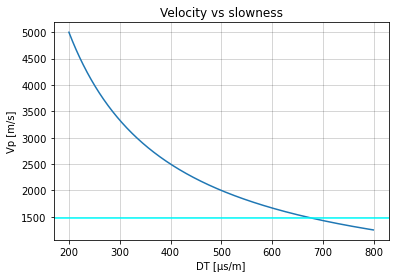

In [221]:
dt = np.arange(200, 800)

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(dt, vel_from_slow(dt))

# Optional annotation.
ax.set_title('Velocity vs slowness')
ax.set_xlabel('DT [µs/m]')
ax.set_ylabel('Vp [m/s]')
ax.grid(c='k', alpha=0.2)
ax.axhline(1486, c='cyan')  # Water velocity.

## Optional arguments and default values

Remember `math.log()`? You can optionally pass the base of the logarithm; by default it is Euler's constant, e.

We can do that in our functions too.

Let's say we need a function that will combine the date, the name of a processing company, and a prospect name into a filename. For now we'll assume we're getting [ISO 8601](https://en.wikipedia.org/wiki/ISO_8601) for dates.

In [ ]:
# Let's do this together...


In [1]:
# Start with...
def make_filename(company, prospect, date):
    """
    Combine the date, the name of a processing company,
    and a prospect name into a filename.
    """
    return f"{date}_{company}_{prospect}.sgy"

In [2]:
from datetime import datetime

datetime.now().date().isoformat()

'2021-06-29'

In [3]:
# Build to...
from datetime import datetime

# Doesn't make sense to use a specific date as default... except 'today'.
# Strings are good defaults; mutables are not.

def make_filename(prospect, company='MyCo', date=None):
    """
    Combine the date, the name of a processing company,
    and a prospect name into a filename.
    """
    if date is None:
        date = datetime.now().date().isoformat()

    # Add this at end, it's a good way to parse (almost) "any" date.
    else:
        date = pd.to_datetime(date).date().isoformat()

    return f"{date}_{company}_{prospect}.sgy"

In [4]:
import pandas as pd

date = '26th May 1971'

# As a pandas timestamp. Pandas is good at interpreting dates.
dt = pd.to_datetime(date)
dt

Timestamp('1971-05-26 00:00:00')

In [119]:
# Date only in ISO-8601 format.
dt.date().isoformat()

'1971-05-26'

The output should look similar to this:

    '2020-10-06_MyCo_Alpha.sgy'

In [128]:
make_filename('Alpha')

'2020-10-06_MyCo_Alpha.sgy'

### Exercise

This exercise is about [Gardner's equation](https://www.subsurfwiki.org/wiki/Gardner%27s_equation):

$$ \rho = 310\ V_\mathrm{P}^{\,0.25}\ \ \mathrm{kg}/\mathrm{m}^3 $$


- Implement Gardner's equation as a Python function.
- Make the factor $\alpha$ of 310 and the exponent $\beta$ of 0.25 into arguments the user can change if they want to. I.e. give them default values.
- How can you make this function accept a list of velocities?
- Add this function to your `utils.py` file in the `/notebooks` folder.

In [ ]:
def gardner(vp):
    
    # Your code here.
    

In [1]:
def gardner(vp, alpha=310, beta=0.25):
    """Compute RHOB from Vp using Gardner's relation.
    
    Example
    >>> gardner(2500)
    2192.0310216782973
    """
    rho = alpha * vp**beta
    
    return rho

The following should yield a number close to `2224.1965`.

In [ ]:
gardner(2650)

As before, we can check how the output is related to the inputs.

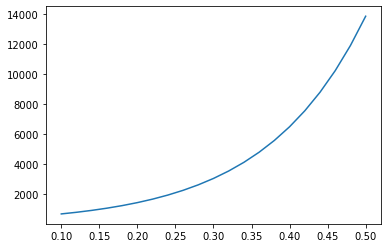

In [6]:
# Talk through this.
vp = 2000
alpha = 310
beta = np.linspace(0.1, 0.5, 21)

rhob_g = gardner(vp, alpha=alpha, beta=beta)

fig, ax = plt.subplots()
ax.plot(beta, rhob_g)

This <code>gardner</code> function will allow us pass in _any_ combination of $\alpha$ and $\beta$ and return a density. As before, we can check how the output is related to the inputs. In this case, there are two, so we'll have to represent the output as a surface.

We can look at all possible combinations of $\alpha$ and $\beta$ (within a range) using a NumPy trick. Then we can contour this surface to help delineate the range of physically plausible values.

In [55]:
vp = 2000
alpha = np.linspace(200, 400, 21)
beta = np.linspace(0.1, 0.45, 21) 

rhob_g = gardner(vp, alpha=alpha, beta=beta.reshape(-1, 1)) # This trick produces the grid of output.
rhob_g.shape

(21, 21)

In [70]:
# More about that NumPy trick.

a = np.array([1, 2, 3, 4, 5])
b = np.array([100, 200, 300])  # Different length! So a * b would fail.

a * b.reshape(-1, 1)  # Reshape b to a column vector. Equivalent to a * b[:, None]

# Instead of multiply(a, b), we have gardner(alpha, beta), otherwise it's the same idea.
# Note we don't actually make a grid at any point. NumPy produces the grid.

array([[ 100,  200,  300,  400,  500],
       [ 200,  400,  600,  800, 1000],
       [ 300,  600,  900, 1200, 1500]])

Any time we have a 2D array we can look at it with `plt.imshow`.

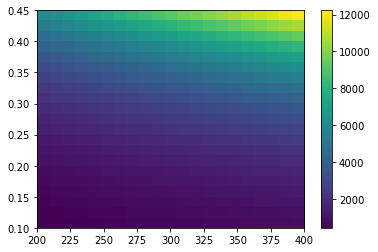

In [76]:
extent = [alpha[0], alpha[-1], beta[0], beta[-1]]

fig, ax = plt.subplots()
im = ax.imshow(rhob_g, origin='lower', extent=extent, aspect='auto')
plt.colorbar(im)

Not all combinations of $\alpha$ and $\beta$ will be physically possible. Some will be extremely low, some will be extremely high. 

For instance: 

- The density of water is 1000 kg/m<sup>3</sup> (more if it's saline). 
- The density of coal can be as low as 1200 kg/m<sup>3</sup>. 
- The density of granite is 2750 kg/m<sup>3</sup> and basalt can be 2950 kg/m<sup>3</sup>. 
- The density of cast iron is 7000 kg/m<sup>3</sup>.

So we may choose to bracket our solutions to the range between 1200 to 3000 kg/m<sup>3</sup>. Densities above or below this range are unlikely to be found in the subsurface. Especially in sedimentary basins where Gardner's equation is intended.

In [79]:
reasonable = [1200, 2000, 2250, 2750, 3000]

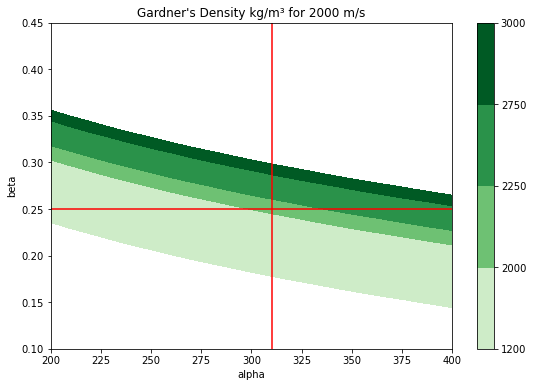

In [80]:
fig, ax = plt.subplots(figsize=(9, 6))

cf = ax.contourf(rhob_g, levels=reasonable, extent=extent, cmap='Greens')
fig.colorbar(cf)

ax.axvline(310, c='r')
ax.axhline(0.25, c='r')

ax.set_title(r"Gardner's Density kg/m³ for 2000 m/s")
ax.set_xlabel('alpha')
ax.set_ylabel('beta')

plt.show()

## Multiple returns

Functions can only return one thing, but we can pack multiple things into a tuple.

Imagine we wanted to adapt our `make_filename()` function to provide a path according to the company, instead of including it in the filename. Now our function can return the path and the filename:

In [78]:
# Let's do this together...



In [143]:
import os

def make_filename(prospect, company='MyCo', date=None, area=None):
    """
    Combine the date, the name of a processing company,
    and a prospect name into a filename.
    """
    if date is None:
        date = datetime.now().date().isoformat()

    else:
        date = pd.to_datetime(date).date().isoformat()

    # ONLY THIS PART IS NEW
    path = os.path.join(os.path.sep, 'ext', 'data', company)
    fname = f'{date}_{prospect}.sgy'
        
    return path, fname

In [144]:
make_filename('Alpha')

('/ext/data/MyCo', '2020-10-06_Alpha.sgy')

In [145]:
path, fname = make_filename('Beta')

os.path.join(path, fname)

'/ext/data/MyCo/2020-10-06_Beta.sgy'

----

# Intro to Python students: go to the [`Practice_functions.ipynb`](Practice_functions.ipynb) notebook.

----

### Exercise

Write a function to list the prospects processed by each company. Your function should return a dictionary mapping each company (CGG, TGS, etc) to the prospect(s) they processed seismic data for (Alpha, Beta, etc).

In [61]:
fnames = [
 '2017-03-19.CGG.Gamma.segy',
 '2016-02-02.CGG.Iota.segy',
 '2016-02-01.CGG.Iota.segp',
 '2020-10-03.TGS.Alpha.segy',
 '2008-01-21.PGS.Zeta.segy',
 '2008-01-21.PGS.Zeta.segp',
 '2008-02-02.WesternGeco.Beta.segy',
]

We've been asked for a list of the prospects processed by each company.

In [63]:
def process(fnames):
    
    # YOUR CODE HERE


In [86]:
def process(fnames, sort=False, dupes=True):
    """
    Process a list of files into a dictionary of datasets.
    """    
    # Add as later 'feature'.
    if sort:
        fnames = sorted(fnames)
    
    datasets = {}
    for fname in fnames:
        
        date, company, prospect, ftype = fname.split('.')
        
        if company in datasets:
            prospects = datasets[company]
        else:
            prospects = []

        if prospect not in prospects or dupes:
            prospects.append(prospect)

        datasets[company] = prospects
        
    return datasets

# It would be better to use datasets.get(company, list()) and append to that.
# It would be even better to use collections.defaultdict:
#     datasets = defaultdict(list)
#     for fname in fnames:
#         date, company, prospect, ftype = prospect_.split('.')
#         datasets[company].append(prospect)

In [87]:
process(fnames)

{'CGG': ['Gamma', 'Iota', 'Iota'],
 'TGS': ['Alpha'],
 'PGS': ['Zeta', 'Zeta'],
 'WesternGeco': ['Beta']}

In [77]:
from collections import defaultdict

def process(fnames, sort=False, dupes=True):
    """
    Process a list of files into a dictionary of datasets.
    """    
    if sort:
        fnames = sorted(fnames)
    
    datasets = defaultdict(list)
    for fname in fnames:
        
        date, company, prospect, ftype = fname.split('.')
        
        if prospect not in datasets[company] or dupes:
            datasets[company].append(prospect)
        
    return datasets


## `args` and `kwargs`

This is a more advanced concept, but it's good to know about. We can write functions that take an arbitrary number of arguments, as well as arguments you give specific names to:

In [14]:
def add(*args):
    print(args)
    return sum(args)

add(2, 3, 4, 5, 6, 7)

(2, 3, 4, 5, 6, 7)


27

We can mix this with an arbitrary number of positional and keyword arguments:

In [15]:
def foo(x, y, *args):
    """
    Print these things.
    """
    print(x, y)
    print(args)
    return

In [16]:
foo(2, 'this', 'that', 45)

2 this
('that', 45)


The unnamed `args` are stored in a `tuple`, and this is what was printed out by `print(args)`.

You can pass keyword arguments in the same way, with a slightly different syntax:

In [17]:
def bar(x, y=1, **kwargs):
    print(x, y)
    print(kwargs)
    return

This time the unspecified `kwargs` are stored in a `dict`:

In [18]:
bar(2, 'this', that='that', other=45)

2 this
{'that': 'that', 'other': 45}


You can create a `dict` of containing the keywords and values outside the function and pass it in. The `**kwargs` syntax unpacks the element of the dictionary for use inside the function:

In [ ]:
func_params = dict(param1='alpha', param2='beta', param3=99.0)

func_params

In [ ]:
bar(2, **func_params)

In [48]:
lineplot_params = {'xlabel': 'time (s)', 'linewidth': 2, 'color': '#DD1D21'}

In [47]:
def my_awesome_plot(x, y, **kwargs):
    label_text = kwargs.pop('xlabel') # we have to pop this off before passing into plot()
    plt.title('Two sine waves')
    plt.xlabel(label_text)
    plt.ylabel('Signal')
    plt.plot(x, y, **kwargs)
    plt.scatter(x, y)

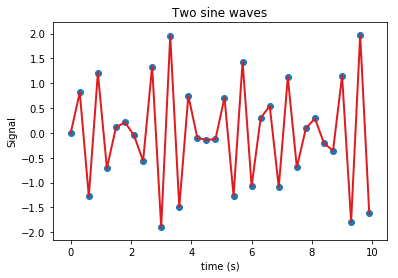

In [49]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(0, 10, 0.3)
y = np.sin(10 * x) + np.sin(8 * x)
my_awesome_plot(x, y, **lineplot_params)

## Passing functions, and unnamed functions

Functions have names, just like other objects in Python. We can pass them around, just like other objects. Sometimes we might want to use a function as input to another function.

For example, the `sorted` function sorts sequences:

In [2]:
x = list('I Love Geology')

sorted(x)

[' ', ' ', 'G', 'I', 'L', 'e', 'e', 'g', 'l', 'o', 'o', 'o', 'v', 'y']

Notice how Python sorts the upper case characters before the lower case ones. Supposing we'd like to ignore the case of the letters when sorting? Then we can pass `str.lower` and it will use that...

In [3]:
sorted(x, key=str.lower)

[' ', ' ', 'e', 'e', 'G', 'g', 'I', 'L', 'l', 'o', 'o', 'o', 'v', 'y']

If there's no function for the sort you'd like to do, you can make one. Let's sort by a completely arbitrary order:

In [7]:
ORDER = 'the quick brown fox jumped over the lazy dog'  # Any pangram will do.

    
def fox_sort(xi):
    return ORDER.index(xi.lower())

sorted(x, key=fox_sort)

['e', 'e', ' ', ' ', 'I', 'o', 'o', 'o', 'v', 'L', 'l', 'y', 'G', 'g']

Sometimes in a situation like this you don't actually want to go to the trouble of defining a function, especially such a short one. Python has a 'function-lite' option — the `lambda` — which we define but don't name. You can think of it as a one-shot, throwaway, or temporary function:

In [8]:
sorted(x, key=lambda xi: ORDER.index(xi.lower()))

['e', 'e', ' ', ' ', 'I', 'o', 'o', 'o', 'v', 'L', 'l', 'y', 'G', 'g']

The syntax is a little weird though, and some people think that using a lot of `lambda` functions makes for hard-to-read code.

### Exercise

I have a list of rocks, can you sort them by the last letter in each name?

Here's the desired result: `['sandstone', 'chalk', 'basalt']`

In [10]:
# Add your code here. HINT: define a function.
rocks = ['basalt', 'chalk', 'sandstone']

# Add your code here. HINT: define a function.

sorted(rocks, key=last_char)

NameError: name 'last_char' is not defined

In [11]:
rocks = ['basalt', 'chalk', 'sandstone']

# Function goes here
def last_char(name):
    return name[-1]

# Now calling the function 
sorted(rocks, key=last_char)

['sandstone', 'chalk', 'basalt']

In [12]:
sorted(rocks, key=lambda name: name[-1])

['sandstone', 'chalk', 'basalt']

In [13]:
from operator import itemgetter

sorted(rocks, key=itemgetter(-1))

['sandstone', 'chalk', 'basalt']

### Exercise

Can you sort this list of files in numerical order?

Here's the desired result: `['file01.txt', 'file2.txt', 'file03.txt', 'file11.txt', 'file12.txt']`

In [14]:
files = ['file2.txt', 'file03.txt', 'file11.txt', 'file12.txt', 'file01.txt']

# Your code goes here



In [15]:
def get_file_number(fname):
    return int(fname.split('.')[0].replace('file', ''))

sorted(files, key=get_file_number)

['file01.txt', 'file2.txt', 'file03.txt', 'file11.txt', 'file12.txt']

## A note about documentation

There are two main kinds of documentation:

- Docs that you write to help people understand how to use your tool.
- Comments in the code to help other coders understand how the tool works.

In general, you should try to write code that does not need copious documentation. Using descriptive variable and function names, keeping functions simple, and writing function docstrings all help.

Docstrings are the least that is required of you — these will become available to users of your code, as shown in the examples that follow. First, here's how to write a docstring: 

In [18]:
def ignore_case(x):
    """
    This is a docstring. It's special.
    
    Args:
        x (str). A string to send to lowercase.
        
    Returns:
        str. The string in lowercase.
    """
    # This is just a normal comment.
    return x.lower()  # So is this.

Now let's look at how another person might read this information. The easiest way to get it is to call `help()` on the function:

In [20]:
help(ignore_case)

Help on function ignore_case in module __main__:

ignore_case(x)
    This is a docstring. It's special.
    
    Args:
        x (str). A string to send to lowercase.
        
    Returns:
        str. The string in lowercase.



You could also inspect the docstring directly; Python stores it on an attribute of the function called `__doc__`:

In [19]:
print(ignore_case.__doc__)


    This is a docstring. It's special.
    
    Args:
        x (str). A string to send to lowercase.
        
    Returns:
        str. The string in lowercase.
    


In Jupyter Notebooks and in the IPython interpreter you can also type the name of the function with a `?`

In [23]:
ignore_case?

## A note about testing

Testing is an important step in writing correct code. Indeed, programmers have a saying:

 > Untested code is broken code.
 
In our experience, the process of writing tests often reveals bugs, and almost always results in better code. 

A quick and easy way to get started with testing is the built-in `doctest` module. Simply add one or more examples to the docstring of the function:

In [29]:
def ignore_case(x):
    """
    This is a docstring. It's special.
    
    Args:
        x (str). A string to send to lowercase.
        
    Returns:
        str. The string in lowercase.
        
    Example:
    >>> ignore_case('Geology.')
    'geology.'

    """
    # This is just a normal comment.
    return x.lower()  # So is this.

Then we can test the function like this:

In [30]:
import doctest
doctest.testmod()

TestResults(failed=0, attempted=1)

Our test passed! `doctest` looked for the line that looks like interactive Python input (with the `>>>` at the start), ran it, and compared its output to the line in my example. Since the lines matched, the test passed. You can add as many tests as you like to the docstring.

See [the `docstring` documentation](https://docs.python.org/3.6/library/doctest.html) for more details, or check out the notebook [Introduction to testing](Intro_to_testing.ipynb) to go deeper.

## A note about type hints

New in Python 3. Essentially a type of documentation. [Read about them.](https://docs.python.org/3/library/typing.html) [Read PEP484](https://www.python.org/dev/peps/pep-0484/).

You can check the internal consistency of types using [mypy](http://mypy-lang.org/index.html).

Python is **strongly typed** — you cannot add an `int` to a `str`. For example, `2 + '3'` throws a `TypeError`, whereas in JavaScript, which is weakly typed, it returns `'23'`. 

But Python is **dynamically typed**, so I can do `x = 5` and then, later, `x = 'Hello'` — the type of `x` is dynamic, and depends only on the data I point it to. Similarly, I can pass ints, floats or strings into a function that multiplies things:

In [31]:
def double(n):
    return 2 * n

double('this')

'thisthis'

As you might imagine, sometimes this kind of flexibility can be the cause of bugs. 

The basic idea of type hints is to bridge the gap between dynamic typing (Python's usual mode, so to speak), and static typing (a popular feature of some other languages, such as Java or C).

You can annotate a variable assignment with the expected type of the variable, for example:

In [32]:
n: float = 3.14159

There's a similar signature for annotating functions, with some special syntax for annotating the return variable too:

In [33]:
def double(n: float) -> float:
    return 2 * n

double(2.1)

4.2

These are just annotations, however, there is no actual type checking. You can still do whatever you want.

In [34]:
double('that')

'thatthat'

You can, however, check the internal consistency of types using [mypy](http://mypy-lang.org/index.html).

The `typing` module helps make hybrid types, new types, etc.

In [35]:
from typing import List

def scale(scalar: float, vector: List[float]) -> List[float]:
    return [scalar * num for num in vector]

new_vector = scale(2.0, [1.0, -4.2, 5.4])

In [36]:
new_vector

[2.0, -8.4, 10.8]

None of this changes the actual type of the variables:

In [51]:
type(new_vector)

list

<hr />

<div>
<img src="https://avatars1.githubusercontent.com/u/1692321?s=50"><p style="text-align:center">© Agile Geoscience 2018</p>
</div>